In [1]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install opencv-python==4.5.5.62

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.4 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [3]:
from google.colab.patches import cv2_imshow   # 코랩에서 실행이 안되기때문에

In [7]:
import cv2

In [4]:
import cv2
import numpy as np

In [5]:
import matplotlib.pyplot as plt

# 이미지 형태학적 변형(팽창, 침식)

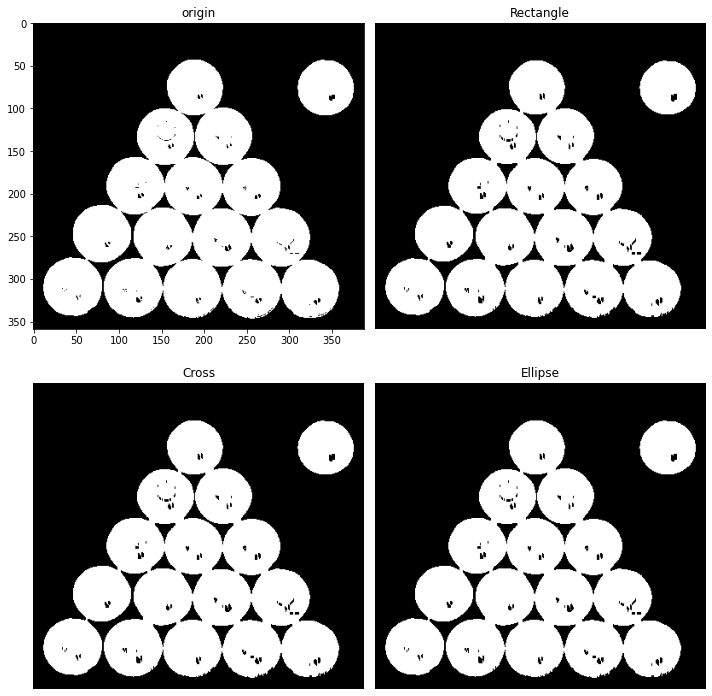

In [17]:
# 확장, 침식 실험 예시 2

image = cv2.imread('./Billiards.png', cv2.IMREAD_GRAYSCALE)

_, mask=cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)

kernel = []
for i in [cv2.MORPH_RECT, cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE]:
  kernel.append(cv2.getStructuringElement(i,(11,11)))

title = ['Rectangle', 'Cross', 'Ellipse']

## erosion example
title = ['Rectangle', 'Cross', 'Ellipse']
kernel = np.ones((3,3), np.uint)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(mask, 'gray')
plt.title('origin')

for i in range(3):
    erosion = cv2.erode(mask, kernel[i])
    plt.subplot(2, 2, i + 2)
    plt.imshow(erosion, 'gray')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

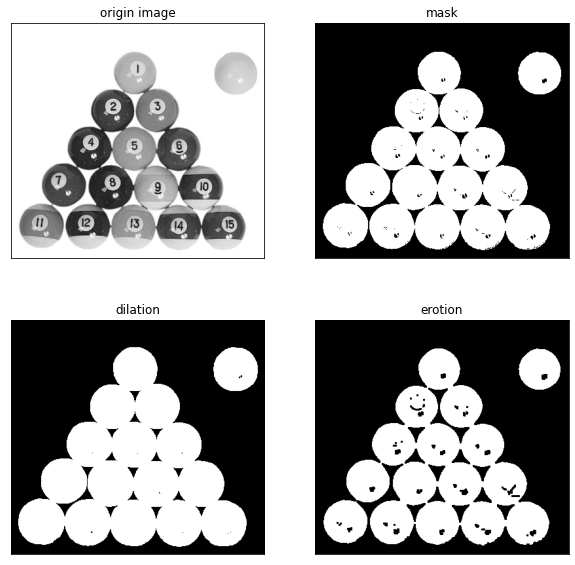

In [16]:
## dilation example

kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
images = [image, mask, dilation, erosion]
title = ['origin image', 'mask', 'dilation', 'erotion']
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

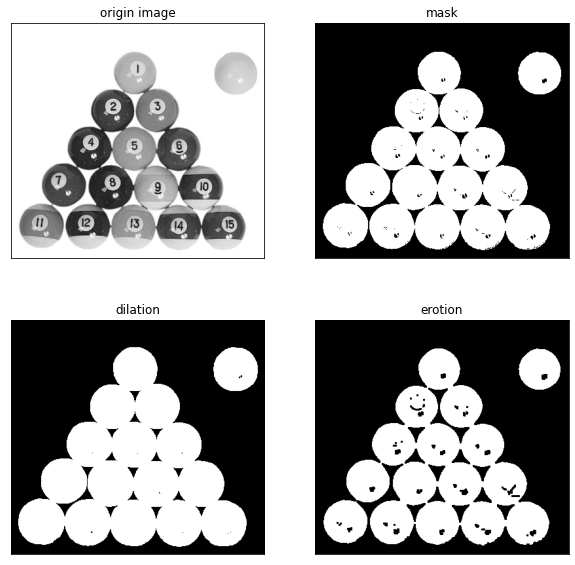

In [18]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
images = [image, mask, dilation, erosion]
title = ['origin image', 'mask', 'dilation', 'erotion']
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

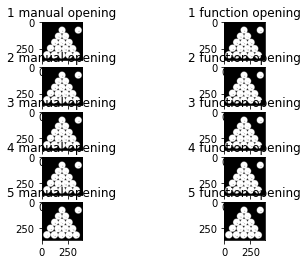

In [21]:
# 개폐(opening, closing)
# opening : erosion -> dilation (to delete dot noise)
idx =1
N = 5
for i in range(1,N+1):
  erosion = cv2.erode(mask, kernel, iterations=1)
  opening = cv2.dilate(erosion, kernel, iterations=1)
  f_opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

  plt.subplot(N, 2, idx)
  idx += 1
  plt.imshow(opening, 'gray')
  plt.title(f'{i} manual opening')

  plt.subplot(N, 2, idx)
  idx += 1
  plt.imshow(f_opening, 'gray')
  plt.title(f'{i} function opening')

plt.show()

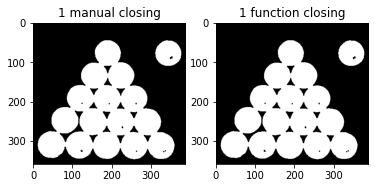

In [22]:
# 개폐(opening, closing)
# closing : dilation -> erosion (to delete object edge line)
idx =1
N = 1
for i in range(1,N+1):
  erosion = cv2.dilate(mask, kernel, iterations=1)
  closing = cv2.erode(erosion, kernel, iterations=1)
  f_closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)

  plt.subplot(N, 2, idx)
  idx += 1
  plt.imshow(closing, 'gray')
  plt.title(f'{i} manual closing')

  plt.subplot(N, 2, idx)
  idx += 1
  plt.imshow(f_closing, 'gray')
  plt.title(f'{i} function closing')

plt.show()

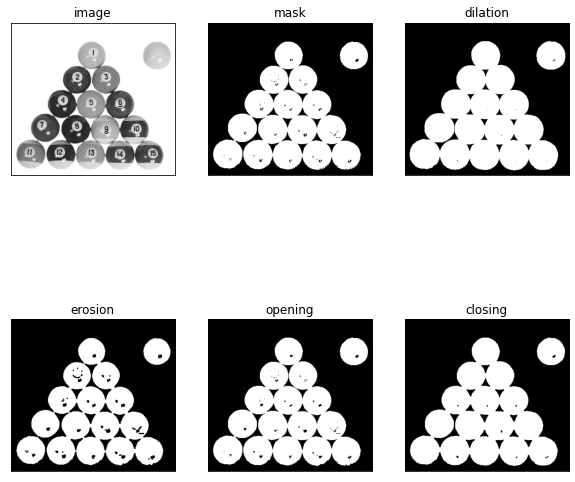

In [27]:
# 개폐(opening, closing)
# 차이비교

title = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing']

kercel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE, kernel)

images = [image, mask, dilation, erosion, opening, closing]
plt.figure(figsize=(10,10))
for i, im in enumerate(images):
  plt.subplot(2, 3, i+1)
  
  plt.imshow(im, 'gray')
  plt.title(title[i])
  plt.xticks([])
  plt.yticks([])

plt.show()

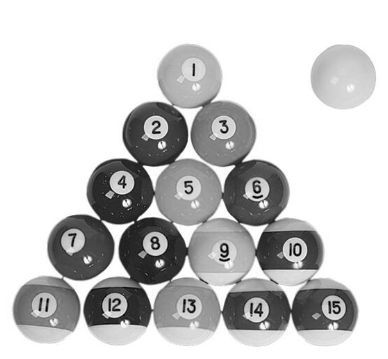

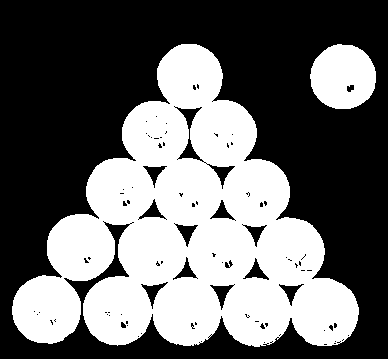

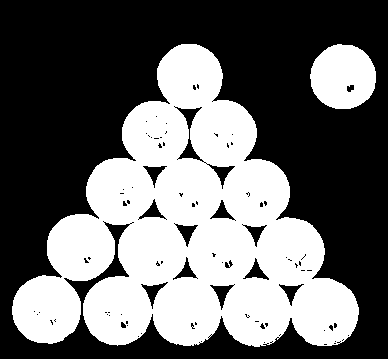

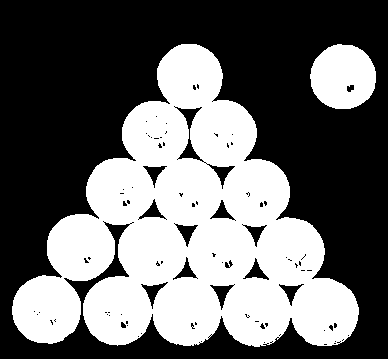

error: ignored

In [31]:
# 확장, 침식 실험 예시 3
# Method
# Morphological gradient and Top hat operations : 형태학적 기울기 및 상단 모자 작업
"""
Gradient : dectect edge ( dilation - erosion)
Tophat : original - opening
Blackhat : closing - original
opening : dilation -> erosion
closing : erosion -> dilation
"""

op_idx = {
    'gradient' : cv2.MORPH_GRADIENT,
    'tophat' : cv2.MORPH_TOPHAT,
    'blackhat' : cv2.MORPH_BLACKHAT,
}

def onChange(k, op_name):
  if k == 0:
    cv2_imshow(op_name, mask)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(k,k))
  dst = cv2.morphologyEx(mask, op_idx[op_name], kernel)
  cv2_imshow(op_name,dst)

cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(mask)
cv2_imshow(mask)

cv2.createTrackbar('k', 'gradient', 0, 300, lambda x: onChange(k=x, op_name='gradient'))
cv2.createTrackbar('k', 'tophat', 0, 300, lambda x: onChange(k=x, op_name='tophat'))
cv2.createTrackbar('k', 'blackhat', 0, 300, lambda x: onChange(k=x, op_name='blackhat'))

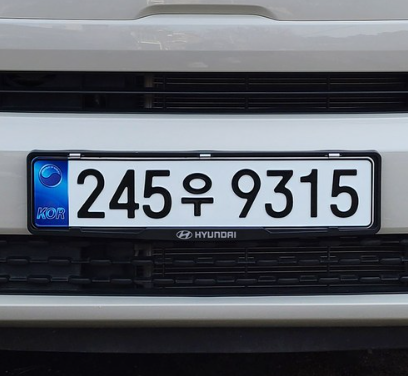

376 408 3


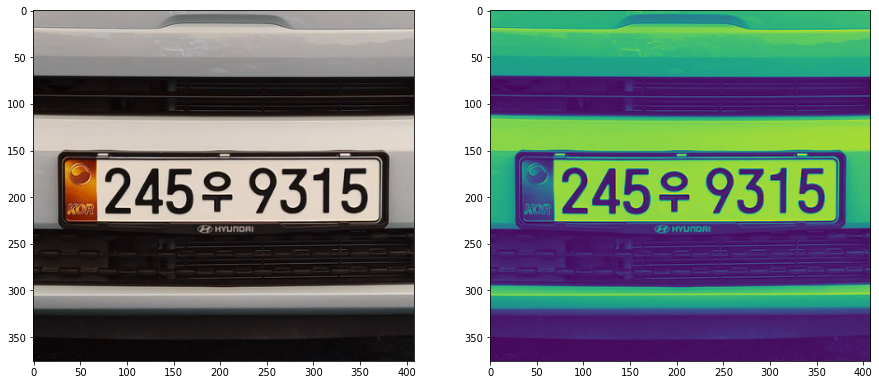

In [47]:
def imshow(src, windowName='show', close=False):
    cv2_imshow(src)
    cv2.waitKey(0)
    if close:
        cv2.destroyAllWindows()

img_ori = cv2.imread('car.png')
rgb_img = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
# img_ori[:,:,0]=0
# img_ori[:,:,1]=0
# img_ori[:,:,2]=0
imshow(img_ori)

# cv2.imshow('origin', img_ori)
# cv2.imshow('origin2', img_ori)
# key = cv2.waitKey(0)
#
# if key == ord('q'):
#     print('key is q')

height, width, channel = img_ori.shape
print(height, width, channel)

# Convert Image to grayscale
img_gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img_ori)
plt.subplot(1,2,2)
plt.imshow(img_gray)

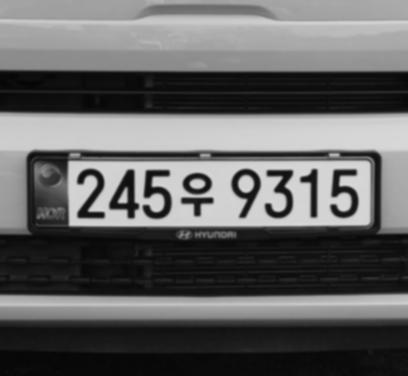

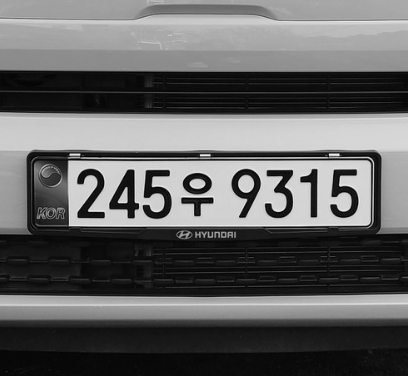

In [45]:
# 가우시안 블러 처리

img_blurred = cv2.GaussianBlur(img_gray, ksize=(5,5), sigmaX=0)
imshow(img_blurred)
imshow(img_gray)

img_blur_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19, # dff over 3
    C=9
)

img_thresh = cv2.adaptiveThreshold(
    img_gray,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19, # dff over 3
    C=9
)

plot_images([img_ori, img_blurred, img_thresh, img_blur_thresh])


### 이후부터 파이참